In [7]:
import matplotlib.pyplot as plt
import mplhep as hep
import json

In [11]:
with open('pulls.json') as f:
    pulls = json.load(f)

In [97]:
def draw_one_vbl(vbl,x, d, ax_ii):
    x_array = [x-0.2, x, x+0.2]
    y_array = [d[k][vbl][0] for k in d.keys()]
    yerr_array = [d[k][vbl][1] for k in d.keys()]
    
    line = ax_ii.errorbar(x = x_array, y = y_array, yerr=yerr_array, marker='o', linestyle='')
    ax_ii.set_ylabel(vbl + ' pull')
    ax_ii.set_xticks([])

    return line
    
def draw_one_model(x, d, ax):
    line = draw_one_vbl('x', x, d, ax[0][0])
    line = draw_one_vbl('y', x, d, ax[1][0])
    line = draw_one_vbl('cotAlpha', x, d, ax[0][1])
    line = draw_one_vbl('cotBeta', x, d, ax[1][1])
    return line


In [98]:
def format_plot(ax, n_models):
    ax[0][0].plot([-1,n_models],[0,0],color='gray')
    ax[1][0].plot([-1,n_models],[0,0],color='gray')
    ax[0][1].plot([-1,n_models],[0,0],color='gray')
    ax[1][1].plot([-1,n_models],[0,0],color='gray')

    ax[0][0].plot([-1,n_models],[1,1],color='gray',linestyle=':')
    ax[1][0].plot([-1,n_models],[1,1],color='gray',linestyle=':')
    ax[0][1].plot([-1,n_models],[1,1],color='gray',linestyle=':')
    ax[1][1].plot([-1,n_models],[1,1],color='gray',linestyle=':')

    ax[0][0].plot([-1,n_models],[-1,-1],color='gray',linestyle=':')
    ax[1][0].plot([-1,n_models],[-1,-1],color='gray',linestyle=':')
    ax[0][1].plot([-1,n_models],[-1,-1],color='gray',linestyle=':')
    ax[1][1].plot([-1,n_models],[-1,-1],color='gray',linestyle=':')

    ax[0][0].set_xlim(-1,n_models)
    ax[1][0].set_xlim(-1,n_models)
    ax[0][1].set_xlim(-1,n_models)
    ax[1][1].set_xlim(-1,n_models)

Model = max_2conv_20t--------------
Model = full_2dconv_20t--------------
Model = slim_2dconv_20t--------------


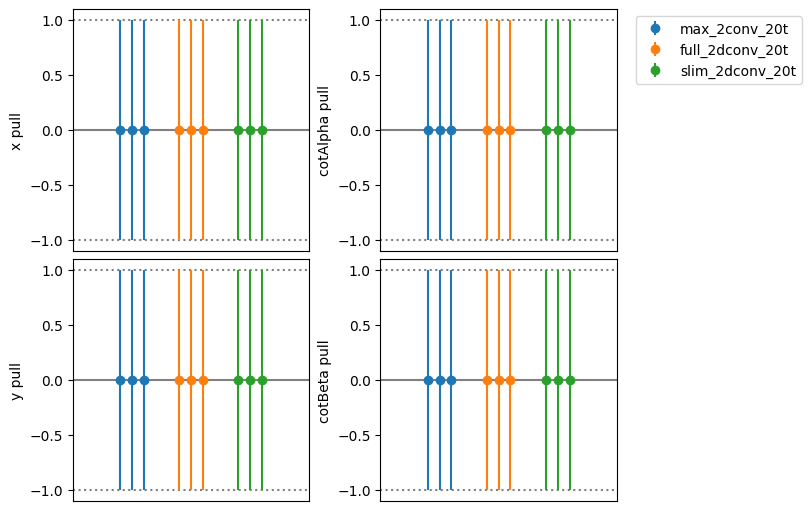

In [102]:
fig, ax = plt.subplots(2,2,figsize=(8,5),constrained_layout=True)
format_plot(ax, len(pulls.keys()))

lines = []
labels = pulls.keys()

for i,k1 in enumerate(labels):
    print("Model = " + k1 + "--------------")
    line = draw_one_model(i,pulls[k1],ax)
    lines += [line]
    
ax[0][1].legend(lines,labels,bbox_to_anchor=(1.05, 1))
plt.show()